<a href="https://colab.research.google.com/github/kulasekara02/BEST-MEAL/blob/master/Bibliometric_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading data (replace the path with your own file's path)
df = pd.read_csv('/mnt/data/new.csv')

# Renaming for easier plots/summaries
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

# Data preview
df[["Publication Type","Publication Year","Author","Title","Publication Title","Conference Name","Manual Tags"]]

# Publication Dynamics
# Manual adjustment of the incomplete last year
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/294)  # Assuming incomplete year data (up to Oct 21)

# Plotting the dynamics
plt.figure(figsize=(12, 6))
for col in year_item_counts_adjusted.columns:
    plt.plot(year_item_counts_adjusted.index, year_item_counts_adjusted[col], label=col)

plt.title("Publication Dynamics by Type")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/new.csv'

Saving new.csv to new.csv


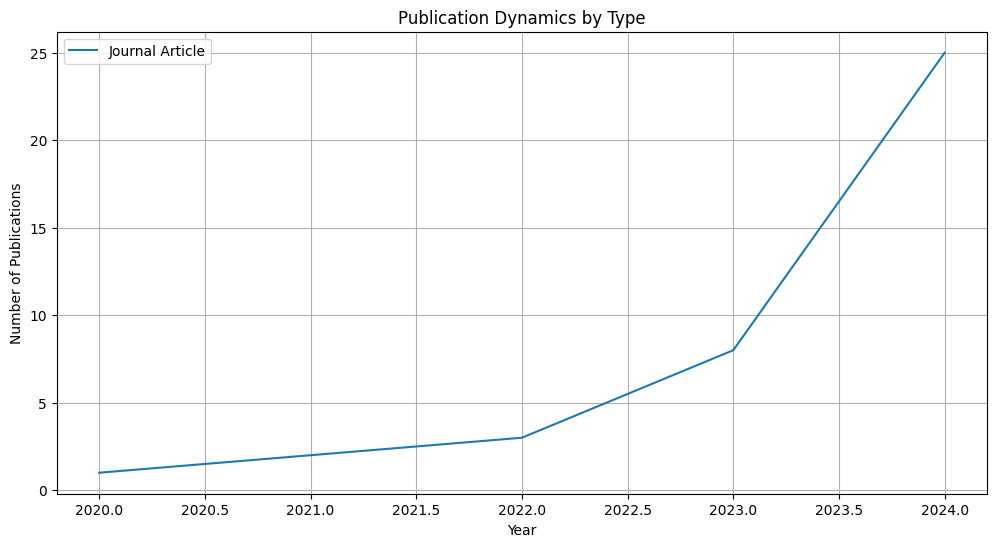

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Uploading and loading the data
from google.colab import files
uploaded = files.upload()

# Assuming the file name is provided during the upload
file_name = list(uploaded.keys())[0]

# Load the CSV into a DataFrame
df = pd.read_csv(file_name)

# Renaming for easier plots/summaries
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

# Publication Dynamics
# Manual adjustment of the incomplete last year
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/294)  # Assuming incomplete year data (up to Oct 21)

# Plotting the dynamics
plt.figure(figsize=(12, 6))
for col in year_item_counts_adjusted.columns:
    plt.plot(year_item_counts_adjusted.index, year_item_counts_adjusted[col], label=col)

plt.title("Publication Dynamics by Type")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend()
plt.grid(True)
plt.show()


Saving new.csv to new (1).csv


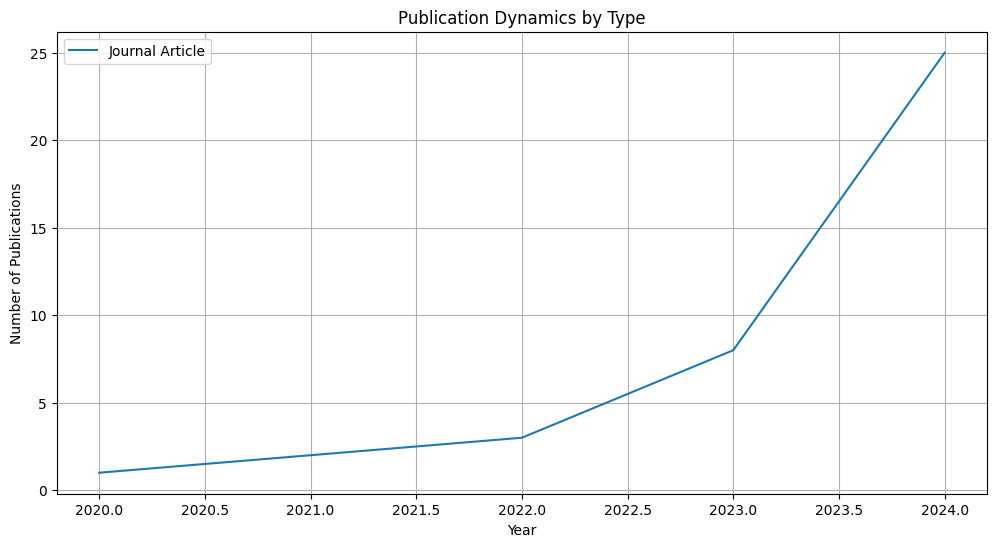

The dataset does not contain a 'Citations' column.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Uploading and loading the data
from google.colab import files
uploaded = files.upload()

# Assuming the file name is provided during the upload
file_name = list(uploaded.keys())[0]

# Load the CSV into a DataFrame
df = pd.read_csv(file_name)

# Renaming for easier plots/summaries
df = df.rename(columns={"Item Type": "Publication Type"})
df['Manual Tags'] = df['Manual Tags'].apply(lambda x: [tag.strip() for tag in x.split(';')] if isinstance(x, str) else [])
df['Publication Type'] = df['Publication Type'].replace('bookSection', 'Book Section').replace('conferencePaper', 'Conference Paper').replace('journalArticle', 'Journal Article')

# Publication Dynamics
# Manual adjustment of the incomplete last year
year_item_counts = df.groupby(['Publication Year', 'Publication Type']).size().unstack(fill_value=0)
year_item_counts_adjusted = year_item_counts.copy()
if 2024 in year_item_counts_adjusted.index:
    year_item_counts_adjusted.loc[2024] = np.round(year_item_counts_adjusted.loc[2024] * 365/294)  # Assuming incomplete year data (up to Oct 21)

# Plotting the dynamics
plt.figure(figsize=(12, 6))
for col in year_item_counts_adjusted.columns:
    plt.plot(year_item_counts_adjusted.index, year_item_counts_adjusted[col], label=col)

plt.title("Publication Dynamics by Type")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend()
plt.grid(True)
plt.show()

# Extracting the top 10 most-cited papers
# Check if a 'Citations' column exists in the DataFrame
if 'Citations' in df.columns:
    # Convert the 'Citations' column to numeric in case it is stored as a string
    df['Citations'] = pd.to_numeric(df['Citations'], errors='coerce')

    # Get the top 10 most-cited papers
    top_10_cited = df.nlargest(10, 'Citations')

    # Display the relevant details of these papers
    top_10_details = top_10_cited[['Author', 'Title', 'Publication Year', 'Publication Type', 'Citations']]
    print(top_10_details)
else:
    print("The dataset does not contain a 'Citations' column.")
